# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
def jaccard_similarity(d1,d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))
  return inter/union

In [3]:
d1 = 'Think like a man of action and act like man of thought.'
d2 = 'Try no to become a man of success but rather try to become a man of value.'
d3 = 'Give me liberty, of give me death'

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


In [4]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 한국어 형태소 분석기 설치

In [5]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 45.2MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
     |████████████████████████████████| 3.8MB 42.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [9]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/ma

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [10]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [11]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []

for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [12]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [13]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [14]:
word2vec = Word2Vec(reviews,min_count=5)
word2vec

In [15]:
word2vec.most_similar('영화')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('작품', 0.9605631828308105),
 ('마음', 0.9586812257766724),
 ('듯', 0.955374002456665),
 ('모습', 0.9457602500915527),
 ('따듯', 0.9451229572296143),
 ('이야기', 0.9440884590148926),
 ('에게', 0.9428198933601379),
 ('바탕', 0.9408624172210693),
 ('느낌', 0.9403340220451355),
 ('고통', 0.9398656487464905)]

* t-sne을 이용한 단어 벡터 시각화

In [16]:
tsne = TSNE(n_components=2)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [17]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.10389826,  0.03096962, -0.03436763, ...,  0.04464586,
        -0.2854984 ,  0.02897734],
       [-0.3787099 ,  0.20477678, -0.084011  , ...,  0.5017797 ,
        -0.5441465 ,  0.1436919 ],
       [-0.70349246,  0.13647103, -0.4798805 , ...,  0.5453368 ,
        -0.04267529, -0.118673  ],
       ...,
       [-0.01119476,  0.01222431,  0.00442861, ...,  0.00647132,
        -0.04096179,  0.00694098],
       [-0.01565405,  0.01297363,  0.00874818, ...,  0.01751583,
        -0.02721295,  0.01249819],
       [-0.03427258,  0.01824299,  0.00888203, ...,  0.02090172,
        -0.04198002,  0.01307844]], dtype=float32)

In [19]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x','y'])
df[:10]

,x,y
어릴,-6.337439,34.082069
때,25.265377,39.819065
보,26.985378,33.492256
고,28.309320,34.424805
지금,25.649654,36.725269
다시,26.586504,34.552753
봐도,25.263376,35.607780
재밌,22.919216,61.321690
어요,22.139944,60.268559
ㅋㅋ,19.557220,60.972435


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


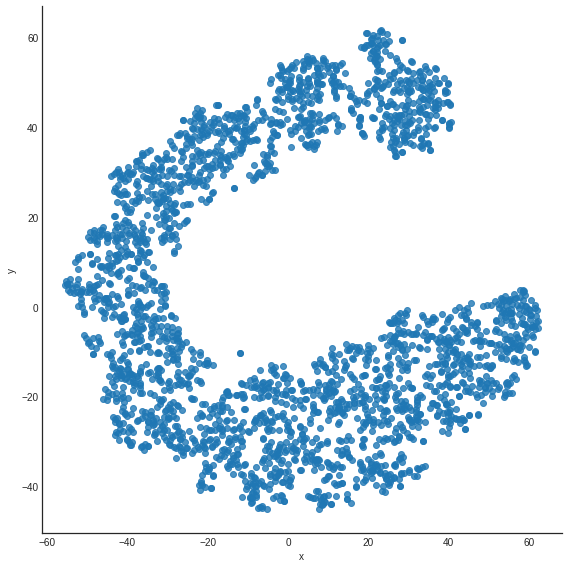

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
sns.lmplot('x','y',data=df, fit_reg=False,size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [24]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([4, 2, 2, ..., 3, 3, 3])

In [25]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-6.337439,34.082069,4
때,25.265377,39.819065,2
보,26.985378,33.492256,2
고,28.309320,34.424805,2
지금,25.649654,36.725269,2
다시,26.586504,34.552753,2
봐도,25.263376,35.607780,2
재밌,22.919216,61.321690,2
어요,22.139944,60.268559,2
ㅋㅋ,19.557220,60.972435,2


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


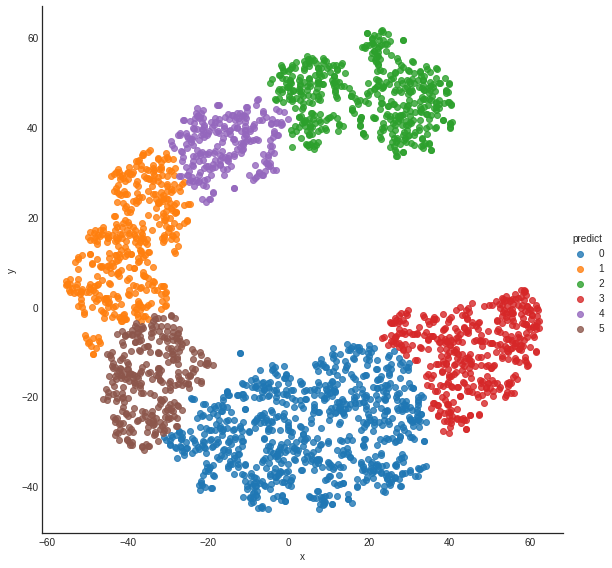

In [27]:
sns.lmplot('x','y',data=results,fit_reg=False,size=8,hue='predict')
plt.show()

#### average

In [28]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([3, 1, 1, ..., 4, 4, 4])

In [29]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-6.337439,34.082069,3
때,25.265377,39.819065,1
보,26.985378,33.492256,1
고,28.309320,34.424805,1
지금,25.649654,36.725269,1
다시,26.586504,34.552753,1
봐도,25.263376,35.607780,1
재밌,22.919216,61.321690,1
어요,22.139944,60.268559,1
ㅋㅋ,19.557220,60.972435,1


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


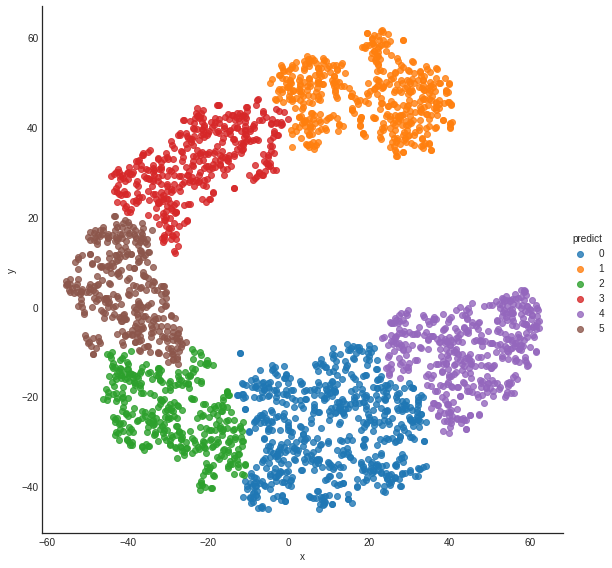

In [30]:
sns.lmplot('x','y',data=results,fit_reg=False,size=8,hue='predict')
plt.show()

#### complete

In [32]:
complete = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = complete.fit_predict(df)
predict

array([0, 1, 1, ..., 3, 3, 3])

In [34]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-6.337439,34.082069,0
때,25.265377,39.819065,1
보,26.985378,33.492256,1
고,28.309320,34.424805,1
지금,25.649654,36.725269,1
다시,26.586504,34.552753,1
봐도,25.263376,35.607780,1
재밌,22.919216,61.321690,1
어요,22.139944,60.268559,1
ㅋㅋ,19.557220,60.972435,1


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


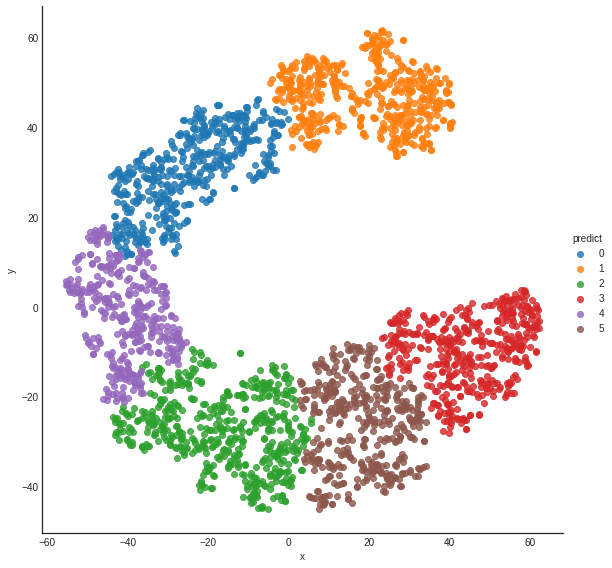

In [35]:
sns.lmplot('x','y',data=results,fit_reg=False,size=8,hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [42]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,32.134889,33.343035,34.662882,32.111690,32.942488,31.653425,39.986857,38.700046,37.344680,47.877079,44.998792,47.840189,51.151678,46.025751,48.133617,59.318082,45.198107,47.637991,47.606777,45.289523,69.781258,40.451735,46.768079,41.226938,44.971319,34.551295,39.163329,31.551061,21.061666,42.903113,22.433784,46.437263,38.128378,66.256237,24.783616,46.562724,33.016337,35.258245,36.085716,...,73.743971,69.146142,74.680942,65.294229,79.906820,66.929885,63.581741,76.541577,67.258183,73.934500,62.671991,74.988034,67.274805,78.873659,54.974046,77.064981,64.025233,62.977089,76.036582,80.833860,64.769999,75.153427,80.385891,32.319730,66.420447,55.950700,75.753803,73.804039,57.976366,59.756294,62.877256,71.011909,73.719704,69.434513,67.776764,77.754893,73.900851,77.782474,74.351495,67.186335
1,32.134889,0.000000,6.556441,6.193839,3.117570,5.429495,4.211285,21.630241,20.686955,21.910000,15.872520,16.105090,15.846695,79.394610,15.749839,17.451234,65.926780,15.851553,16.190029,16.188837,13.581759,48.664777,68.403768,74.023721,10.233887,13.103019,65.352833,19.655144,6.040934,28.098479,11.519538,20.724127,15.659418,6.254998,75.211631,16.390872,15.753470,1.237925,8.083529,66.165092,...,64.944232,64.660134,76.304729,54.424686,64.531136,62.623541,65.166248,77.970715,70.443076,52.758710,60.505021,66.662350,60.507120,57.959496,64.955401,57.816030,52.497810,47.839009,61.545758,62.895487,51.893847,57.807146,76.436316,64.327786,69.363950,49.595696,54.410394,69.515366,56.129729,60.002795,66.770456,51.633859,85.437494,49.123255,58.559319,60.452273,60.477800,56.913502,52.020004,51.734725
2,33.343035,6.556441,0.000000,1.619404,3.498076,1.133029,2.727771,28.124918,27.211185,28.466432,17.578636,20.929476,17.594412,77.724124,19.793394,21.005309,60.422228,20.470551,19.022968,19.063714,16.277130,42.714346,66.818446,72.117488,8.282440,15.512613,64.886199,26.134741,12.579999,33.069732,15.013156,26.020872,19.299505,7.076642,69.829866,22.044041,19.354782,7.419220,14.394012,65.417371,...,58.397610,58.251705,70.195087,47.873656,58.129215,56.236919,59.162739,71.833633,64.520771,46.858474,54.263272,60.119205,54.029788,52.065889,59.869357,51.704576,45.946910,41.347832,55.085345,56.681169,45.354050,51.509226,69.995141,64.823103,63.431791,43.197187,48.551156,63.089585,49.963558,53.951655,60.961248,45.486941,80.285082,43.065822,52.017101,54.166790,53.972238,51.004708,46.302498,45.276882
3,34.662882,6.193839,1.619404,0.000000,3.516527,1.727561,3.267600,27.431654,26.569923,27.953102,15.968285,19.606434,15.985204,79.328763,18.352293,19.499528,61.742143,19.113042,17.463421,17.507047,14.722083,42.560581,68.418247,73.728203,6.743785,13.942614,66.421497,25.426132,12.203448,33.575844,13.544928,26.395840,17.812103,5.533959,71.182400,22.267179,17.862768,6.831203,13.614431,66.972060,...,59.038866,59.128618,71.286003,48.466795,58.347316,57.136336,60.308513,72.909466,65.699990,46.674966,55.279791,60.777312,54.816003,51.879751,61.290691,51.660608,46.514882,41.705837,55.383127,56.716477,45.836816,51.618241,70.834718,66.267640,64.607268,44.104031,48.343911,63.947321,51.028442,55.076678,62.185277,45.468943,81.685425,42.982700,52.678095,54.263937,54.350724,50.827392,46.015915,45.574975
4,32.111690,3.117570,3.498076,3.516527,0.000000,2.365906,1.182367,24.747509,23.803456,25.000856,16.800215,18.542967,16.794209,78.119008,17.813356,19.297754,63.074811,18.190822,17.672355,17.691552,14.951183,46.027933,67.156105,72.638457,9.192132,14.319554,64.611804,22.771062,9.095873,30.077706,13.244156,22.880091,17.526892,6.232344,72.404215,18.760786,17.603317,4.127601,11.143081,65.295485,...,61.844593,61.552993,73.262762,51.338012,61.608698,59.519485,62.153528,74.921354,67.455290,50.1

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

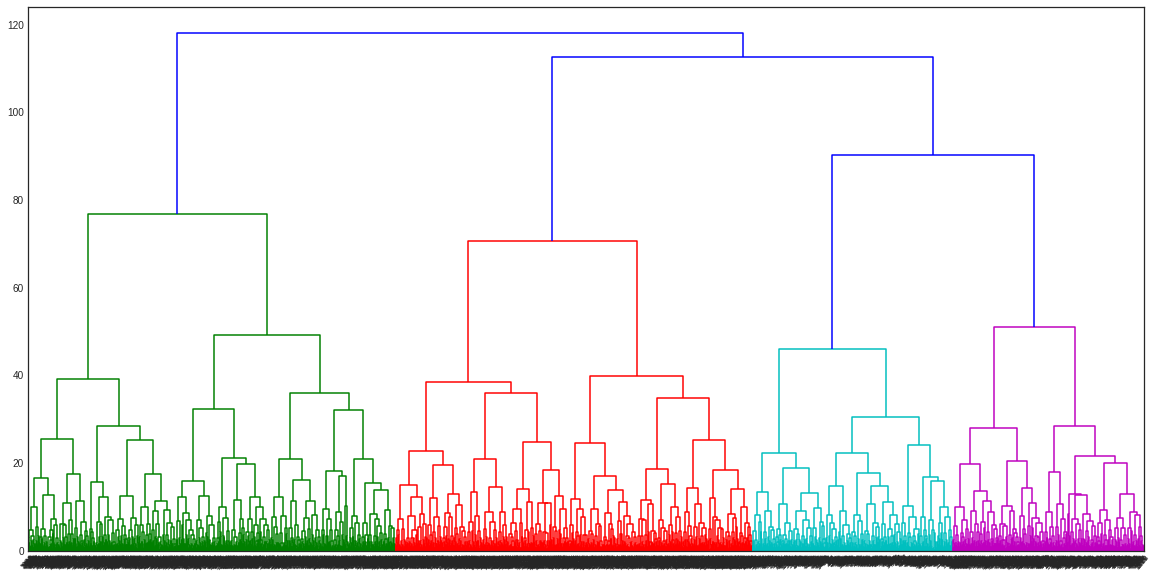

In [43]:
row_clusters = linkage(distmatrix, method='complete')
plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

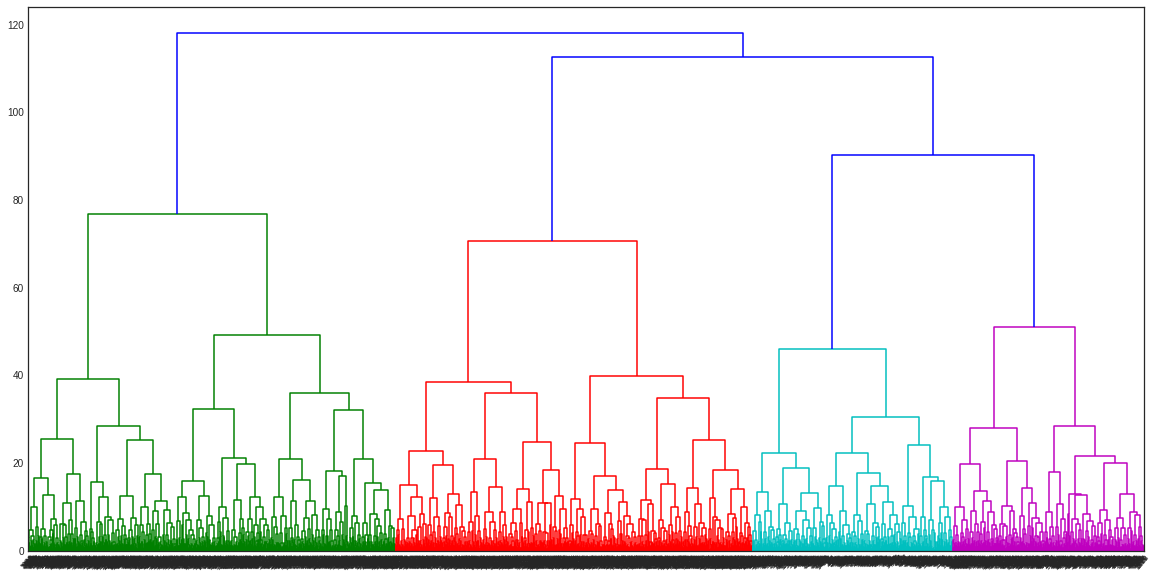

In [45]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20,10))
dendrogram(mergings,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [53]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-6.337439,34.082069,0
때,25.265377,39.819065,0
보,26.985378,33.492256,0
고,28.309320,34.424805,0
지금,25.649654,36.725269,0
다시,26.586504,34.552753,0
봐도,25.263376,35.607780,0
재밌,22.919216,61.321690,0
어요,22.139944,60.268559,0
ㅋㅋ,19.557220,60.972435,0


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


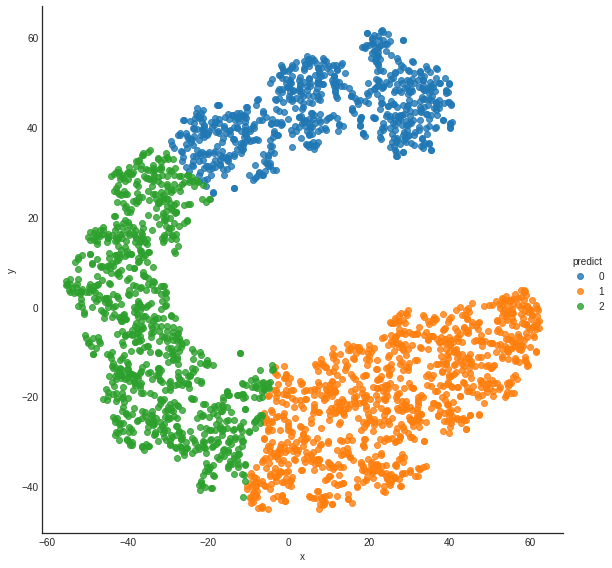

In [54]:
sns.lmplot('x','y',data=results,fit_reg=False,size=8,hue='predict')
plt.show()

### 클러스터 개수 6

In [55]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([2, 0, 0, ..., 4, 4, 4], dtype=int32)

In [56]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-6.337439,34.082069,2
때,25.265377,39.819065,0
보,26.985378,33.492256,0
고,28.309320,34.424805,0
지금,25.649654,36.725269,0
다시,26.586504,34.552753,0
봐도,25.263376,35.607780,0
재밌,22.919216,61.321690,0
어요,22.139944,60.268559,0
ㅋㅋ,19.557220,60.972435,0


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


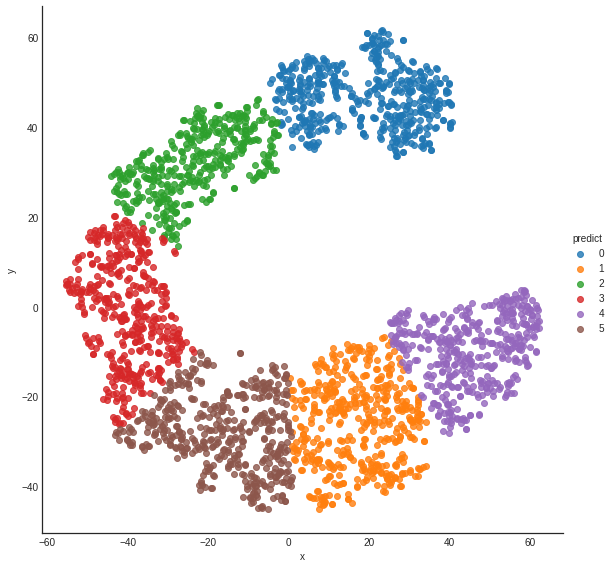

In [57]:
sns.lmplot('x','y',data=results,fit_reg=False,size=8,hue='predict')
plt.show()